In [1]:
#Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar
import seaborn as sns

In [2]:
#Asignando variable a valores nulos
sentinels = {'PRECIP': ['Nulo'], 'EVAP': ['Nulo'], 'TMAX': ['Nulo'],'TMIN': ['Nulo']}
#Leyendo el archivo
df0 = pd.read_csv("cajeme.txt",skiprows=0,sep='\s+',na_values=sentinels)

In [3]:
#Definiendo el dataframe
df = pd.DataFrame(df0)

In [4]:
#Cambiando la columna de fecha a formato fecha
df['FECHAN'] = pd.to_datetime(df.apply(lambda x: x['FECHA'], 1), dayfirst=True)
df = df.drop(['FECHA'], 1)

In [5]:
#Mostrando los tipos
df.dtypes

PRECIP           float64
EVAP             float64
TMAX             float64
TMIN             float64
FECHAN    datetime64[ns]
dtype: object

In [6]:
#Mostrando descripción del data frame
df.describe()

,PRECIP,EVAP,TMAX,TMIN
count,10531.000000,7324.000000,10503.000000,10514.000000
mean,0.894511,5.814091,32.601047,14.880873
std,5.948456,2.431426,5.770682,6.881583
min,0.000000,0.200000,13.000000,-2.500000
25%,0.000000,3.900000,28.000000,9.000000
50%,0.000000,5.500000,33.000000,13.000000
75%,0.000000,7.600000,37.500000,22.000000
max,184.500000,14.900000,47.500000,29.000000


In [7]:
#Definiendo columnas de año y mes
df['MES'] = df['FECHAN'].dt.month
df['AÑO'] = df['FECHAN'].dt.year
df.head()

,PRECIP,EVAP,TMAX,TMIN,FECHAN,MES,AÑO
0,0.0,1.2,25.0,7.0,1980-01-01,1,1980
1,0.0,1.7,22.0,8.0,1980-01-02,1,1980
2,0.0,1.9,25.0,9.0,1980-01-03,1,1980
3,0.0,1.8,26.0,6.0,1980-01-04,1,1980
4,0.0,2.0,26.0,4.0,1980-01-05,1,1980


In [8]:
#Buscando el número de años
NumA = len(df['AÑO'].unique())
NumA

32

In [9]:
#Haciendo arreglo de meses y de años
init = 1980
AÑOS = [init + i for i in range(0, NumA)]
init2 = 1
MESES = [init2 + i for i in range(0, 12)]


In [10]:
#Calculando promedio de precipitaciones y temperaturas mensuales
PRECIPPROPMES = [df[df.MES==(init2 + i)].PRECIP.sum()/NumA for i in range (0,12)]
TMAXPROMMES = [df[df.MES==(init2 + i)].TMAX.mean() for i in range (0,12)]
TMINPROMMES = [df[df.MES==(init2 + i)].TMIN.mean() for i in range (0,12)]

TMINPROMMES

[7.488407258064516,
 8.010216346153847,
 8.960457856399584,
 11.10344827586207,
 14.390681003584229,
 20.22530864197531,
 24.048984468339306,
 24.32373271889401,
 23.23735632183908,
 18.449944382647384,
 12.217857142857143,
 8.193763919821826]

In [11]:
#Creando data frame para datos mensuales
d = {'MES': MESES , 'PRECIPPROPMES':PRECIPPROPMES,'TMAXPROMMES': TMAXPROMMES,'TMINPROMMES': TMINPROMMES }
dmes = pd.DataFrame(data=d)
dmes

,MES,PRECIPPROPMES,TMAXPROMMES,TMINPROMMES
0,1,24.140625,25.384577,7.488407
1,2,10.696875,26.821084,8.010216
2,3,2.359375,29.330208,8.960458
3,4,1.493750,32.628308,11.103448
4,5,0.584375,35.624851,14.390681
5,6,3.484375,38.114710,20.225309
6,7,60.290625,38.273653,24.048984
7,8,66.834375,38.229527,24.323733
8,9,76.212500,37.452819,23.237356
9,10,21.475000,35.120824,18.449944


In [12]:
#Calculando promedio de precipitaciones y temperaturas anuales
PRECIPPROPAÑO = [df[df.AÑO==(init + i)].PRECIP.sum()/NumA for i in range (0,NumA)]
TMAXPROMAÑO = [df[df.AÑO==(init + i)].TMAX.mean() for i in range (0,NumA)]
TMINPROMAÑO = [df[df.AÑO==(init + i)].TMIN.mean() for i in range (0,NumA)]


In [13]:
#Creando data frame para datos anuales
d = {'AÑO': AÑOS , 'PRECIPPROPAÑO':PRECIPPROPAÑO,'TMAXPROMAÑO': TMAXPROMAÑO,'TMINPROMAÑO': TMINPROMAÑO }
daño = pd.DataFrame(data=d)
daño

,AÑO,PRECIPPROPAÑO,TMAXPROMAÑO,TMINPROMAÑO
0,1980,5.703125,31.431694,16.181694
1,1981,14.921875,31.073973,16.008219
2,1982,6.796875,31.394521,14.813699
3,1983,2.890625,27.158333,8.800000
4,1984,18.109375,30.625455,15.483636
5,1985,4.046875,27.049451,9.313187
6,1986,5.062500,31.731405,14.409091
7,1987,3.687500,31.702041,13.469388
8,1988,3.156250,32.093333,12.581395
9,1989,0.437500,22.193548,4.548387


In [14]:
#Creando arreglo con labels de mes
MESESlabel = calendar.month_name[1:13]

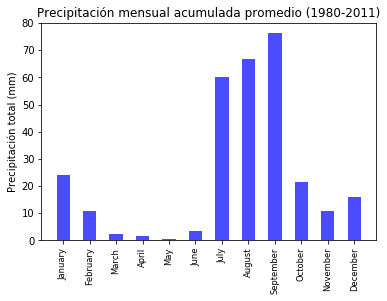

In [15]:
#Creando gráfica para precipitación mensual acumulada promedio
X = MESESlabel
N = np.arange(len(X))
Y = PRECIPPROPMES 
 
plt.bar(N, Y,  width=0.5,align='center', alpha=0.7,color='b')
plt.xticks(N, X, size = 'small', color = 'k', rotation = 90)
plt.ylabel('Precipitación total (mm)')
plt.title('Precipitación mensual acumulada promedio (1980-2011)')
plt.savefig('Precip_mensual',plt=2000)
plt.show()

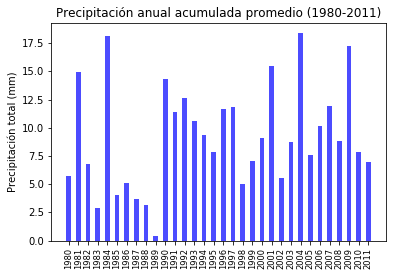

In [16]:
#Creando gráfica para precipitación mensual acumulada promedio
X = AÑOS
N = np.arange(len(X))
Y = PRECIPPROPAÑO 
 
plt.bar(N, Y,  width=0.5,align='center', alpha=0.7,color='b')
plt.xticks(N, X, size = 'small', color = 'k', rotation = 90)
plt.ylabel('Precipitación total (mm)')
plt.title('Precipitación anual acumulada promedio (1980-2011)')
plt.savefig('Precip_anual',plt=2000)
plt.show()

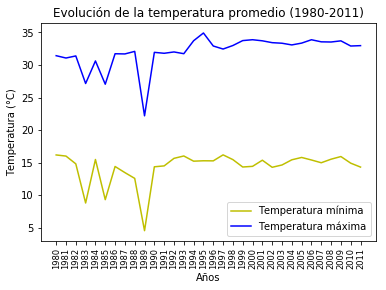

In [17]:
#Creando gráfica para precipitación mensual acumulada promedio
X = AÑOS
N = np.arange(len(X))
Y1 = TMINPROMAÑO
Y2 = TMAXPROMAÑO
 
plt.plot(Y1, label = "Temperatura mínima", color = 'y')   
plt.plot(Y2, label = "Temperatura máxima", color = 'b')

plt.xlabel("Años")   
plt.ylabel("Temperatura (°C)")  

plt.xticks(N, X, size = 'small', color = 'k', rotation = 90)
plt.legend()

plt.title('Evolución de la temperatura promedio (1980-2011)')
plt.savefig('Temp_anual',plt=2000)
plt.show()

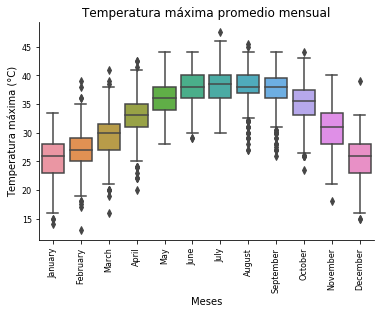

In [18]:
#Diagrama de caja de la temperatura máxima promedio mensual>
box = sns.boxplot(x="MES", y="TMAX", data=df)
box.set( xlabel= 'Meses', ylabel= 'Temperatura máxima (°C)')
box.set_xticklabels(MESESlabel, rotation=90 )
box.tick_params(labelsize=8)
sns.despine()
plt.title('Temperatura máxima promedio mensual')
plt.savefig('cajamax_mensual',plt=2000)
plt.show()     

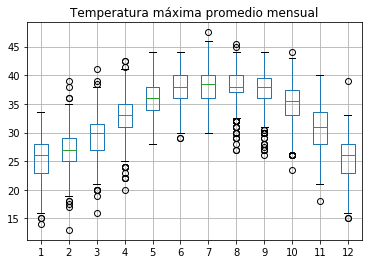

In [31]:
#Diagrama de caja de la temperatura máxima promedio mensual
df2 = df.filter(['TMAX','MES'],axis=1)
df2=df2.pivot(columns='MES',values='TMAX')
df2.boxplot()
plt.title('Temperatura máxima promedio mensual')
plt.savefig('cajamax_mensual2',plt=2000)
plt.show()

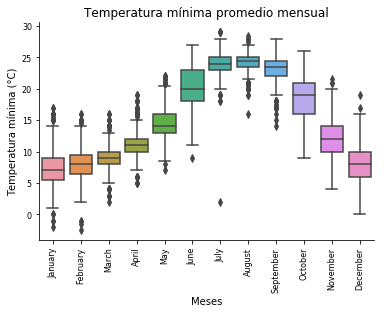

In [20]:
#Diagrama de caja de la temperatura mínima promedio mensual
box = sns.boxplot(x="MES", y="TMIN", data=df)
box.set( xlabel= 'Meses', ylabel= 'Temperatura mínima (°C)')
box.set_xticklabels(MESESlabel, rotation=90 )
box.tick_params(labelsize=8)
sns.despine()
plt.title('Temperatura mínima promedio mensual')
plt.savefig('cajamin_mensual',plt=2000)
plt.show()     

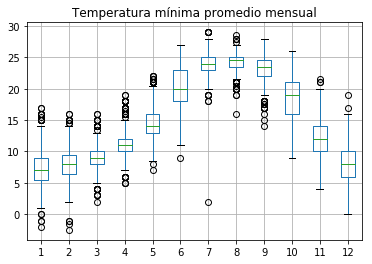

In [32]:
#Diagrama de caja de la temperatura mínima promedio mensual
df2 = df.filter(['TMIN','MES'],axis=1)
df2=df2.pivot(columns='MES',values='TMIN')
df2.boxplot()
plt.title('Temperatura mínima promedio mensual')
plt.savefig('cajamin_mensual2',plt=2000)
plt.show()

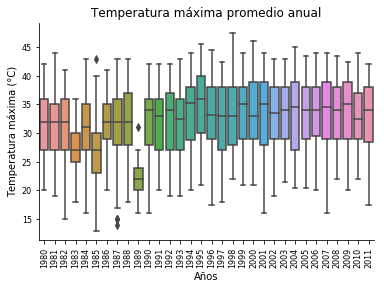

In [21]:
#Diagrama de caja de la temperatura máxima promedio anual
box = sns.boxplot(x="AÑO", y="TMAX", data=df)
box.set( xlabel= 'Años', ylabel= 'Temperatura máxima (°C)')
box.set_xticklabels(box.get_xticklabels(), rotation=90 )
box.tick_params(labelsize=8)
sns.despine()
plt.title('Temperatura máxima promedio anual')
plt.savefig('cajamax_anual',plt=2000)
plt.show()

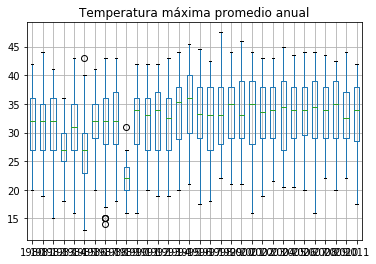

In [33]:
#Diagrama de caja de la temperatura máxima promedio anual
df2 = df.filter(['TMAX','AÑO'],axis=1)
df2=df2.pivot(columns='AÑO',values='TMAX')
df2.boxplot()
box.set_xticklabels(box.get_xticklabels(), rotation=90 )
plt.title('Temperatura máxima promedio anual')
plt.savefig('cajamax_anual2',plt=2000)
plt.show()

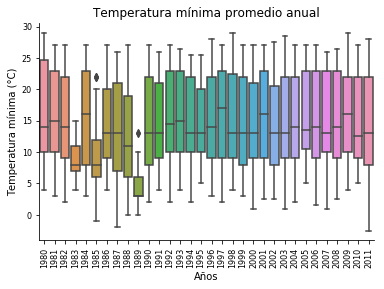

In [22]:
#Diagrama de caja de la temperatura mínima promedio anual
box = sns.boxplot(x="AÑO", y="TMIN", data=df)
box.set( xlabel= 'Años', ylabel= 'Temperatura mínima (°C)')
box.set_xticklabels(box.get_xticklabels(), rotation=90 )
box.tick_params(labelsize=8)
sns.despine()
plt.title('Temperatura mínima promedio anual')
plt.savefig('cajamin_anual',plt=2000)
plt.show()

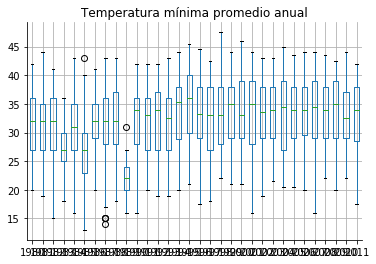

In [34]:
#Diagrama de caja de la temperatura mínima promedio anual
df2 = df.filter(['TMAX','AÑO'],axis=1)
df2=df2.pivot(columns='AÑO',values='TMAX')
df2.boxplot()
box.set_xticklabels(box.get_xticklabels(), rotation=90 )
box.tick_params(labelsize=8)
sns.despine()
plt.title('Temperatura mínima promedio anual')
plt.savefig('cajamin_anual2',plt=2000)
plt.show()